<a href="https://colab.research.google.com/github/Julio-sourc/Account-github/blob/master/RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
treino = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic_train.csv")

In [4]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Tratando dados faltantes**

In [6]:
treino.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


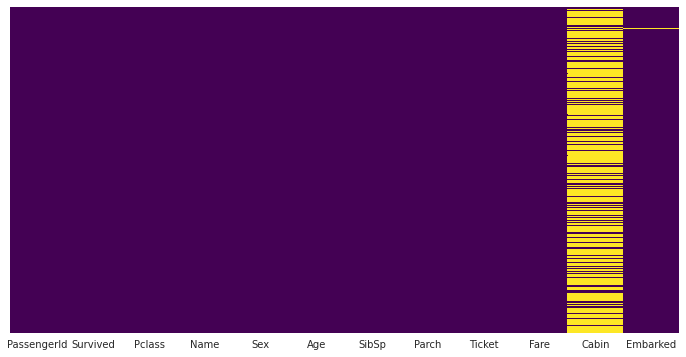

In [27]:
# Heatmap, sem o y barra de labe, barra de cores e com segregação entre 0 e 1.
plt.figure(figsize=(12, 6))
sns.heatmap(treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
sns.set_style('whitegrid')

# **Dados de pessoas que sobreviveram e que não sobreviveram por sexo e classe social**

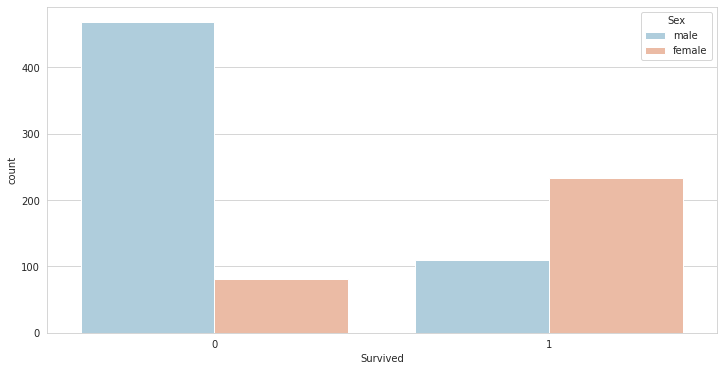

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=treino, hue='Sex', palette='RdBu_r')

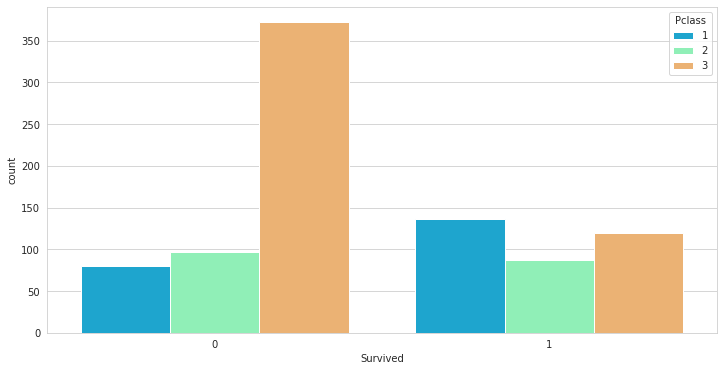

In [10]:
#Por Classe
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=treino, hue='Pclass', palette='rainbow')

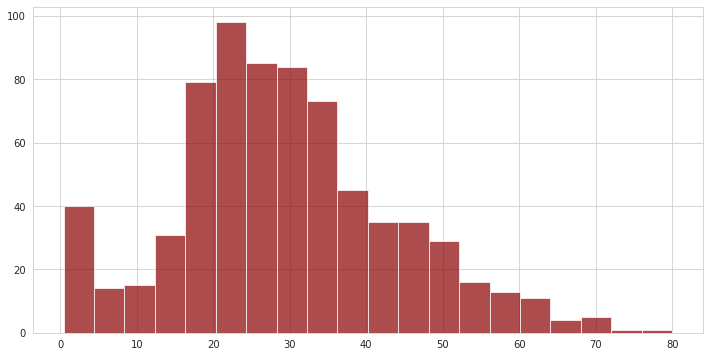

In [11]:
#Distribuição de idade
treino['Age'].hist(bins=20, color='darkred', alpha=0.7, figsize=(12, 6))

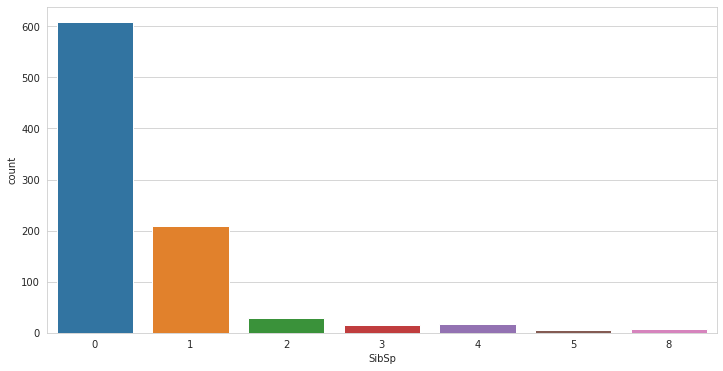

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SibSp', data=treino)

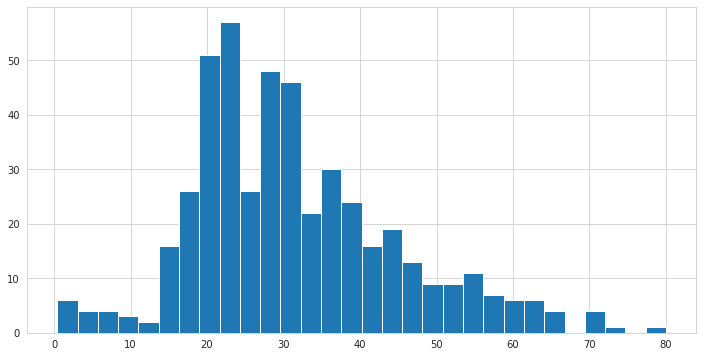

In [13]:
#Split 
treino[treino['SibSp'] == 0]['Age'].hist(bins=30, figsize=(12, 6))

# Preço que as pessoas pagaram para entrar no titanic

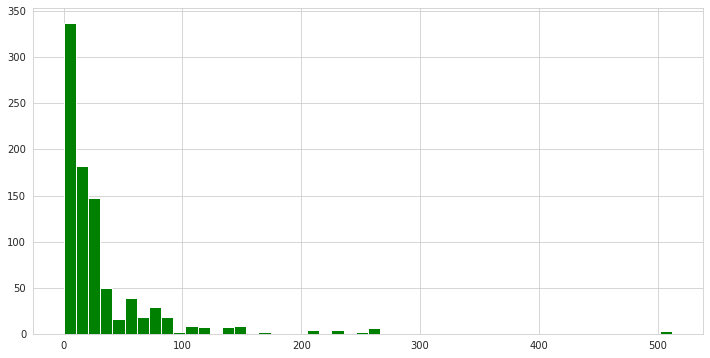

In [14]:
treino['Fare'].hist(color='green', bins=50, figsize=(12, 6) )

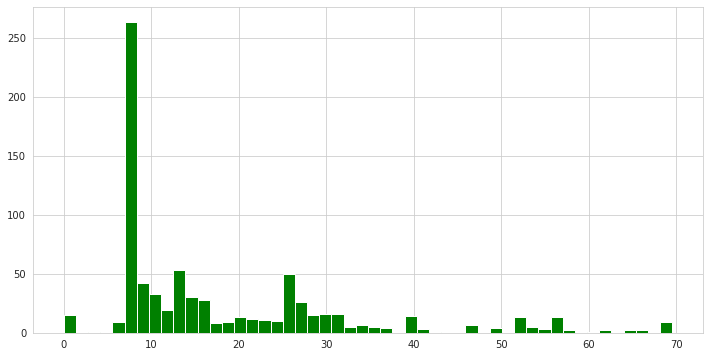

In [15]:
# Pessoas que pagaram menor do que 7 U$$
treino[treino['Fare']<70]['Fare'].hist(color='green', bins=50, figsize=(12, 6))

# **Tratando dados faltantes para a preparação do modelo**

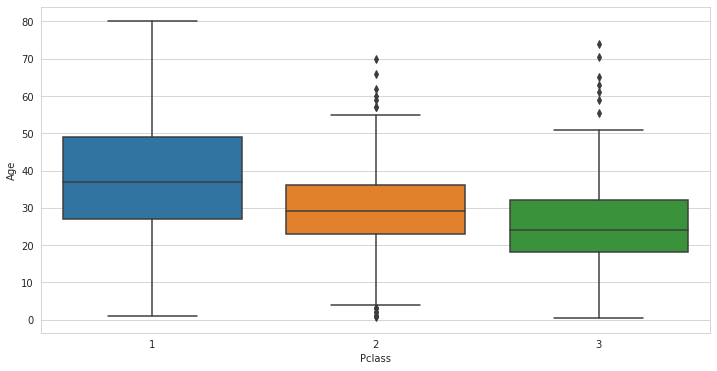

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=treino)

In [24]:
#função para preencher valores vazios do dataSet
def input_idade(cols):
  Idade = cols[0]
  Classe = cols[1]

  if pd.isnull(Idade): #verifica se a idade é nula
      if Classe == 1:
          return 37
      elif Classe == 2:
          return 29
      else:
          return 24
  else: #se não, retorna idade
      return Idade


In [25]:
#Recebendo as duas colunas idade e classe e aplicando no dataFrame
treino['Age'] = treino[['Age', 'Pclass']].apply(input_idade, axis=1)

In [26]:
treino['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
del treino['Cabin']
# treino.drop('Cabin', inplac=True)


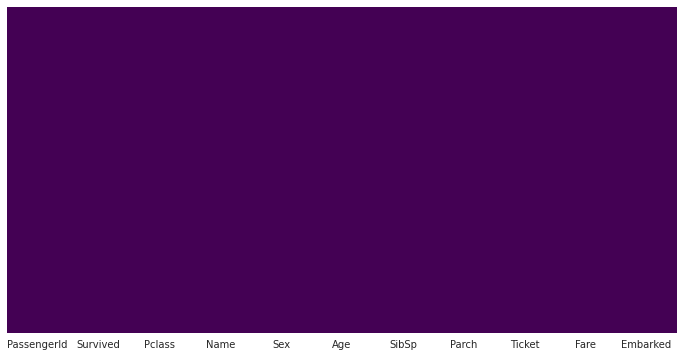

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [30]:
treino.dropna(inplace=True)

# **Tratando dados categóricos essencial para a criação do modelo**

In [34]:
#função get_dummies, da um split e coloca as colunas entre 0 e 1
sex = pd.get_dummies(treino['Sex'], drop_first=True)


In [35]:
treino['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
embarked = pd.get_dummies(treino['Embarked'], drop_first=True)

In [45]:
treino

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,0,1
887,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,24.0,1,2,23.4500,S,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,0


In [ ]:
#Apagando colunas irrelevantes ou que contenham strings pois o modelo só trabalha com dados numéricos 
treino.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [40]:
treino

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,24.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [41]:
# Inputando os dummies das linhas 34 e 37 para dentro do DataSet
treino = pd.concat([treino, sex, embarked], axis=1)

In [42]:
treino.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [47]:
del treino['Embarked']

# **Calibrando o modelo de Regressão Logistica**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(treino.drop('Survived', axis=1), treino['Survived'], test_size=0.3)

In [57]:
logmodel = LogisticRegression()

In [58]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [59]:
prections = logmodel.predict(X_test)

In [60]:
# Estatisticas sobre o modelo e predições que ele encontrou
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test, prections))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       171
           1       0.79      0.73      0.76        96

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [62]:
from sklearn.metrics import confusion_matrix


In [63]:
print(confusion_matrix(y_test, prections))

[[152  19]
 [ 26  70]]
